# Learning from Imbalanced Data

과제내용
- Imbalanced learning 기법 간 성능 비교
- 상세내용은 아래 실험방법 참조


•데이터
- Kaggle Competition으로 2017년말에 개최되었던 "WSDM - KKBox's Music Recommendation Challenge" 데이터에 Feature Engineering을 적용한 것을 사용한다. 
(첨부화일)


•실험방법
- class 변수인 'target' 필드에서 1의 값이 전체 데이터의 0.1%, 1%, 10%가 되도록 축소하여 3가지의 data imbalance 상황을 만든다.
(필요시 위에 더하여 새로운 imbalance 상황을 추가할 수 있음)
- 각각의 data imbalance 상황에서, 여러 Imbalanced learning 기법을 적용한 데이터에 대해  RandomForest 알고리즘을 적용하여 성능을 평가하고 비교한다. 
(존재하는 feature를 수정하지 않고 그대로 사용함)
- 평가척도로는 Accuracy, ROC-AUC, Recall, Precision, F1-score 등 5가지를 사용하고, "Survey of resampling techniques for improving classification performance in unbalanced datasets" 논문(첨부화일)에서 테스트한 기법 중 imbalanced-learn 패키지에서 지원하는 것은 모두 테스트한다.


•제출물
- 소스코드(화일명: 이름1-이름2.ipynb)와 결과보고서(화일명: 이름1-이름2.ppt)
- 4월22일 수업시간에 팀당 10분 이내 발표


•유의사항
- 마감시간 내에 제출한 과제만 평가함. 
- 반드시, 담당교수 이메일(www4u@kookmin.ac.kr)로 제출해야 하고, 메일 제목은 "팀과제(2차) 이름1-이름2"로 할 것.


In [265]:
# ! pip install -U imbalanced-learn # U 하면 새버전으로 깔림.

In [266]:
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from collections import Counter
from sklearn.svm import SVC

In [267]:
data = pd.read_csv("WSDM_train_full_features.csv")

In [268]:
data.head()

,target,user_idx,song_idx,ssn_idx,sst_idx,st_idx,song_length,genr_idx,art_idx,com_idx,...,lyricists_count,composer_count,is_featured,artist_count,artist_composer,artist_composer_lyricist,song_lang_boolean,smaller_song,count_song_played,count_artist_played
0,1,0,0,0,0,0,206471,7,1877,7450,...,0,2,0,0,0,0,0,1,215,1140
1,1,1,1,1,1,1,284584,18,92,2,...,0,1,0,0,0,0,0,0,1,303616
2,1,1,2,1,1,1,225396,18,527,100234,...,0,1,0,0,0,0,0,1,4,289
3,1,1,3,1,1,1,255512,229,89592,193180,...,0,1,0,0,0,0,0,0,1,1
4,1,0,4,0,0,0,187802,13,195,137,...,0,3,0,0,0,0,0,1,412,427


In [269]:
#data=data.iloc[0:round(len(data)/2),:]
#data.shape

In [270]:
#data=data.iloc[0:round(len(data)/2),:]
#data.shape

In [271]:
#data=data.iloc[0:round(len(data)/2),:]
#data.shape

In [272]:
data=data.iloc[0:round(len(data)/16),:]
data.shape

(461089, 30)

In [274]:
print(data_0.shape[0])
print(data_1.shape[0])  

124940
336149


In [275]:
data_1_01 = data_1.iloc[np.random.randint(0,len(data_1),size=round((1/9)*len(data_0)))]
print(data_1_01.shape)
print(data_1_01.head())

(13882, 30)
        target  user_idx  song_idx  ssn_idx  sst_idx  st_idx  song_length  \
59772        1      4531       779        2        3       0       212973   
201715       1      9832      4252        4        3       0       161149   
80403        1      1269     20184        1        1       1       228670   
125226       1       357      1494        1        1       2       210624   
59047        1      1623      5801        1        1       2       257906   

        genr_idx  art_idx  com_idx         ...           lyricists_count  \
59772          1     6373     1963         ...                         0   
201715         8     1093     1392         ...                         5   
80403          0      618        2         ...                         0   
125226        32     1921   103685         ...                         0   
59047         21     3805     2520         ...                         0   

        composer_count  is_featured  artist_count  artist_composer  

In [276]:
df = pd.concat([data_0,data_1_01],axis=0)
df.head()
df.shape

(138822, 30)

In [277]:
data.shape # 원본데이터

(461089, 30)

In [278]:
X = df.iloc[:,1:30]
y = df.iloc[:,0]

In [279]:
# 학습/평가 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((104116, 29), (34706, 29))

## SCORE 모아두기

In [280]:
accuracy = []
roc_auc = []
f1 = []
recall = []
precision = []

# 1. BaseLine

In [281]:
# 원래 데이터를 사용했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_train, y_train).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_train, y_train).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n' ,'roc_auc_score :',roc_auc_score(y_test, y_proba), '\n','f1_score :', f1_score(y_test, y_pred), '\n','recall_score :',recall_score(y_test, y_pred),'\n','precision_score :', precision_score(y_test, y_pred))

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 accuracy_score : 0.8976257707600991 
 roc_auc_score : 0.7084781276037304 
 f1_score : 0.1276700220967346 
 recall_score : 0.07367526211391329 
 precision_score : 0.47794117647058826


In [282]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

In [283]:
print(accuracy)
print(roc_auc )
print(f1 )
print(recall)
print(precision )

[0.8976257707600991]
[0.7084781276037304]
[0.1276700220967346]
[0.07367526211391329]
[0.47794117647058826]


# Under_Sampling
# 2-1. NearMiss1. 

In [284]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=1,random_state=0)

In [285]:
X_resampled_nm1, y_resampled = nm1.fit_sample(X_train, y_train)
X_resampled_nm1.shape

(20706, 29)

In [286]:
accuracy_score(y_test, y_pred)

0.8976257707600991

In [287]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_resampled_nm1, y_resampled).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_resampled_nm1, y_resampled).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n' ,'roc_auc_score :',roc_auc_score(y_test, y_proba), '\n','f1_score :', f1_score(y_test, y_pred), '\n','recall_score :',recall_score(y_test, y_pred),'\n','precision_score :', precision_score(y_test, y_pred))
print()

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 accuracy_score : 0.2760329626001268 
 roc_auc_score : 0.49060050125776167 
 f1_score : 0.17560207362687844 
 recall_score : 0.7582884669878153 
 precision_score : 0.09929867527552043



In [288]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.22      0.35     31177
           1       0.10      0.76      0.18      3529

   micro avg       0.28      0.28      0.28     34706
   macro avg       0.49      0.49      0.27     34706
weighted avg       0.81      0.28      0.34     34706



In [289]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# 2-2. NearMiss2. 

In [290]:
from imblearn.under_sampling import NearMiss
nm2 = NearMiss(version=2,random_state=0)

In [292]:
X_resampled_nm2, y_resampled = nm2.fit_sample(X_train, y_train)
X_resampled_nm2.shape

(20706, 29)

In [293]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_resampled_nm2, y_resampled).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_resampled_nm2, y_resampled).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n' ,'roc_auc_score :',roc_auc_score(y_test, y_proba), '\n','f1_score :', f1_score(y_test, y_pred), '\n','recall_score :',recall_score(y_test, y_pred),'\n','precision_score :', precision_score(y_test, y_pred))

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 accuracy_score : 0.19258917766380454 
 roc_auc_score : 0.5405276155532875 
 f1_score : 0.18540697674418605 
 recall_score : 0.903655426466421 
 precision_score : 0.10330083249651777


In [294]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# 2-3. NearMiss3. 

In [295]:
from imblearn.under_sampling import NearMiss
nm3 = NearMiss(version=3,random_state=0)

In [296]:
X_resampled_nm3, y_resampled = nm3.fit_sample(X_train, y_train)
X_resampled_nm3.shape

(20706, 29)

In [297]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_resampled_nm3, y_resampled).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_resampled_nm3, y_resampled).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n' ,'roc_auc_score :',roc_auc_score(y_test, y_proba), '\n','f1_score :', f1_score(y_test, y_pred), '\n','recall_score :',recall_score(y_test, y_pred),'\n','precision_score :', precision_score(y_test, y_pred))

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 accuracy_score : 0.6106148792715956 
 roc_auc_score : 0.681067457570684 
 f1_score : 0.25402958710532125 
 recall_score : 0.6520260697081326 
 precision_score : 0.1577431959964352


In [298]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# 3. RandomUnderSampler

In [299]:
from imblearn.under_sampling import RandomUnderSampler 

In [300]:
rus = RandomUnderSampler(random_state=0)

In [301]:
X_res, y_res = rus.fit_resample(X_train, y_train)

In [302]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n roc_auc_score :',roc_auc_score(y_test, y_proba), '\n f1_score :', f1_score(y_test, y_pred), '\n recall_score :',recall_score(y_test, y_pred),'\n precision_score :', precision_score(y_test, y_pred))

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 accuracy_score : 0.6993603411513859 
 roc_auc_score : 0.7227424175313317 
 f1_score : 0.2901074976187236 
 recall_score : 0.604137149334089 
 precision_score : 0.19088548661473723


In [303]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# 4. Condensed Nearest Neighbor (CNN)

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [ ]:
cnn = CondensedNearestNeighbour(random_state=0)

In [ ]:
X_res, y_res = cnn.fit_resample(X_train, y_train)

In [ ]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n' ,'roc_auc_score :',roc_auc_score(y_test, y_proba), '\n','f1_score :', f1_score(y_test, y_pred), '\n','recall_score :',recall_score(y_test, y_pred),'\n','precision_score :', precision_score(y_test, y_pred)

In [ ]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# 5. Edited Nearest Neighbor (ENN)

In [304]:
from imblearn.under_sampling import EditedNearestNeighbours

In [305]:
enn = EditedNearestNeighbours(random_state=0)

In [306]:
X_res, y_res = enn.fit_resample(X_train, y_train)

In [307]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n roc_auc_score :',roc_auc_score(y_test, y_proba), '\n f1_score :', f1_score(y_test, y_pred), '\n recall_score :',recall_score(y_test, y_pred), '\n precision_score :', precision_score(y_test, y_pred))

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 accuracy_score : 0.8870224168731632 
 roc_auc_score : 0.7143837542612322 
 f1_score : 0.2038578680203046 
 recall_score : 0.14224992915840182 
 precision_score : 0.35959885386819485


In [308]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# 6. Repeated Edited Nearest Neighbor 

In [309]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours 

In [310]:
renn = RepeatedEditedNearestNeighbours(random_state=0)

In [311]:
X_res, y_res = renn.fit_resample(X_train, y_train)

In [312]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n' ,'roc_auc_score :',roc_auc_score(y_test, y_proba), '\n','f1_score :', f1_score(y_test, y_pred), '\n','recall_score :',recall_score(y_test, y_pred),'\n','precision_score :', precision_score(y_test, y_pred))

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 accuracy_score : 0.869158070650608 
 roc_auc_score : 0.7130668917286161 
 f1_score : 0.2532478210820589 
 recall_score : 0.21819212241428165 
 precision_score : 0.3017241379310345


In [313]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# 7. Tomek Link Removal

In [314]:
from imblearn.under_sampling import TomekLinks 

In [315]:
tl = TomekLinks(random_state=0)

In [316]:
X_res, y_res = tl.fit_resample(X_train, y_train)

In [317]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n' ,'roc_auc_score :',roc_auc_score(y_test, y_proba), '\n','f1_score :', f1_score(y_test, y_pred), '\n','recall_score :',recall_score(y_test, y_pred),'\n','precision_score :', precision_score(y_test, y_pred))

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 accuracy_score : 0.897510516913502 
 roc_auc_score : 0.7193709373330728 
 f1_score : 0.13685998544042707 
 recall_score : 0.07990932275432133 
 precision_score : 0.47635135135135137


In [318]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# Oversampling methods
# 1. Random oversampling of minority class

In [319]:
from imblearn.over_sampling import RandomOverSampler

In [320]:
ros = RandomOverSampler(random_state=0)

In [321]:
X_res, y_res = ros.fit_resample(X_train, y_train)

In [322]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n' ,'roc_auc_score :',roc_auc_score(y_test, y_proba), '\n','f1_score :', f1_score(y_test, y_pred), '\n','recall_score :',recall_score(y_test, y_pred),'\n','precision_score :', precision_score(y_test, y_pred))

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 accuracy_score : 0.8915461303521005 
 roc_auc_score : 0.7280117036309827 
 f1_score : 0.18739205526770294 
 recall_score : 0.12298101445168604 
 precision_score : 0.39347234814143245


In [323]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# 2. SMOTE

In [324]:
from imblearn.over_sampling import SMOTE

In [325]:
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X_train, y_train)

In [326]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_resampled, y_resampled).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_resampled, y_resampled).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n' ,'roc_auc_score :',roc_auc_score(y_test, y_proba), '\n','f1_score :', f1_score(y_test, y_pred), '\n','recall_score :',recall_score(y_test, y_pred),'\n','precision_score :', precision_score(y_test, y_pred))

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 accuracy_score : 0.8763326226012793 
 roc_auc_score : 0.7457077108151846 
 f1_score : 0.2872799734307539 
 recall_score : 0.2451119297251346 
 precision_score : 0.3469715202567188


In [327]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# 3-1. Borderline-SMOTE1

In [328]:
from imblearn.over_sampling import BorderlineSMOTE

In [329]:
X_resampled, y_resampled = BorderlineSMOTE(kind='borderline-1',random_state=0).fit_resample(X_train, y_train)

In [330]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_resampled, y_resampled).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_resampled, y_resampled).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n' ,'roc_auc_score :',roc_auc_score(y_test, y_proba), '\n','f1_score :', f1_score(y_test, y_pred), '\n','recall_score :',recall_score(y_test, y_pred),'\n','precision_score :', precision_score(y_test, y_pred))

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 accuracy_score : 0.880683455310321 
 roc_auc_score : 0.7455858551771327 
 f1_score : 0.26643046944198406 
 recall_score : 0.2130915273448569 
 precision_score : 0.3553875236294896


In [331]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# 3-2.Borderline-SMOTE2

In [332]:
X_resampled, y_resampled = BorderlineSMOTE(kind='borderline-2',random_state=0).fit_resample(X_train, y_train)

In [333]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_resampled, y_resampled).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_resampled, y_resampled).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n' ,'roc_auc_score :',roc_auc_score(y_test, y_proba), '\n','f1_score :', f1_score(y_test, y_pred), '\n','recall_score :',recall_score(y_test, y_pred),'\n','precision_score :', precision_score(y_test, y_pred))

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 accuracy_score : 0.8759004206765401 
 roc_auc_score : 0.7357566351222015 
 f1_score : 0.2671431002212013 
 recall_score : 0.22244261830546896 
 precision_score : 0.33432708688245316


In [334]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# Combination methods
# 1. SMOTE + Tomek Link Removal

In [335]:
from imblearn.combine import SMOTETomek

In [336]:
smt = SMOTETomek(random_state=0)

In [337]:
 X_res, y_res = smt.fit_resample(X_train, y_train)

In [338]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n' ,'roc_auc_score :',roc_auc_score(y_test, y_proba), '\n','f1_score :', f1_score(y_test, y_pred), '\n','recall_score :',recall_score(y_test, y_pred),'\n','precision_score :', precision_score(y_test, y_pred))

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 accuracy_score : 0.8721834841237827 
 roc_auc_score : 0.7441680643285066 
 f1_score : 0.2675033025099075 
 recall_score : 0.22952677812411448 
 precision_score : 0.32053818757419866


In [339]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# 2. SMOTE + ENN

In [340]:
 from imblearn.combine import SMOTEENN

In [341]:
sme = SMOTEENN(random_state=42)

In [342]:
X_res, y_res = sme.fit_resample(X_train, y_train)

In [343]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n' ,'roc_auc_score :',roc_auc_score(y_test, y_proba), '\n','f1_score :', f1_score(y_test, y_pred), '\n','recall_score :',recall_score(y_test, y_pred),'\n','precision_score :', precision_score(y_test, y_pred))

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 accuracy_score : 0.8447242551720163 
 roc_auc_score : 0.7380758277632952 
 f1_score : 0.2971175166297118 
 recall_score : 0.3227543213374894 
 precision_score : 0.27525374577090383


In [344]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# Ensemble Methods
# 1. EasyEnsemble

In [345]:
from imblearn.ensemble import EasyEnsemble

In [346]:
ee = EasyEnsemble(random_state=0)

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class EasyEnsemble is deprecated; EasyEnsemble is deprecated in 0.4 and will be removed in 0.6. Use EasyEnsembleClassifier instead.
  warnings.warn(msg, category=DeprecationWarning)


In [347]:
X_res, y_res = ee.fit_resample(X, y)

In [348]:
X_res=X_res.reshape(-1,29) # -1 행개수를 지정하지 않겠다.
y_res=y_res.reshape(-1,1) # -1 행개수를 지정하지 않겠다.

In [349]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict_proba(X_test)[:,1]

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports u

In [350]:
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n roc_auc_score :',roc_auc_score(y_test, y_proba), '\n f1_score :', f1_score(y_test, y_pred), '\n recall_score :',recall_score(y_test, y_pred),'\n precision_score :', precision_score(y_test, y_pred))

 accuracy_score : 0.9900593557309976 
 roc_auc_score : 0.999887624143442 
 f1_score : 0.953397271376469 
 recall_score : 1.0 
 precision_score : 0.9109447599380486


In [351]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

# 2. BalanceCascade

In [352]:
from imblearn.ensemble import BalanceCascade

In [353]:
bc = BalanceCascade(random_state=42)

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class BalanceCascade is deprecated; BalanceCascade is deprecated in 0.4 and will be removed in 0.6.
  warnings.warn(msg, category=DeprecationWarning)


In [354]:
X_res, y_res = bc.fit_resample(X, y)

In [355]:
X_res=X_res.reshape(-1,29) # -1 행개수를 지정하지 않겠다.
y_res=y_res.reshape(-1,1) # -1 행개수를 지정하지 않겠다.

In [356]:
# 합성 데이터를 추가했을 때의 모델성능
y_pred = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict(X_test)
y_proba = RandomForestClassifier(random_state=0).fit(X_res, y_res).predict_proba(X_test)[:,1]
print(' accuracy_score :', accuracy_score(y_test, y_pred), '\n' ,'roc_auc_score :',roc_auc_score(y_test, y_proba), '\n','f1_score :', f1_score(y_test, y_pred), '\n','recall_score :',recall_score(y_test, y_pred),'\n','precision_score :', precision_score(y_test, y_pred))

C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Bae yuna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bae yuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports u

 accuracy_score : 0.9999135596150521 
 roc_auc_score : 1.0 
 f1_score : 0.9995751310012746 
 recall_score : 1.0 
 precision_score : 0.9991506228765572


In [357]:
accuracy.append(accuracy_score(y_test, y_pred))
roc_auc.append(roc_auc_score(y_test, y_proba))
f1.append(f1_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))

In [358]:
print(accuracy)
print(roc_auc )
print(f1 )
print(recall)
print(precision )

[0.8976257707600991, 0.2760329626001268, 0.19258917766380454, 0.6106148792715956, 0.6993603411513859, 0.8870224168731632, 0.869158070650608, 0.897510516913502, 0.8915461303521005, 0.8763326226012793, 0.880683455310321, 0.8759004206765401, 0.8721834841237827, 0.8447242551720163, 0.9900593557309976, 0.9999135596150521]
[0.7084781276037304, 0.49060050125776167, 0.5405276155532875, 0.681067457570684, 0.7227424175313317, 0.7143837542612322, 0.7130668917286161, 0.7193709373330728, 0.7280117036309827, 0.7457077108151846, 0.7455858551771327, 0.7357566351222015, 0.7441680643285066, 0.7380758277632952, 0.999887624143442, 1.0]
[0.1276700220967346, 0.17560207362687844, 0.18540697674418605, 0.25402958710532125, 0.2901074976187236, 0.2038578680203046, 0.2532478210820589, 0.13685998544042707, 0.18739205526770294, 0.2872799734307539, 0.26643046944198406, 0.2671431002212013, 0.2675033025099075, 0.2971175166297118, 0.953397271376469, 0.9995751310012746]
[0.07367526211391329, 0.7582884669878153, 0.903655

# 시각화

In [359]:
lsts = [accuracy, roc_auc, f1, recall, precision]
score = pd.DataFrame(lsts,index=['accuracy', 'roc_auc', 'f1', 'recall', 'precision'])
print(score)

                 0         1         2         3         4         5   \
accuracy   0.897626  0.276033  0.192589  0.610615  0.699360  0.887022   
roc_auc    0.708478  0.490601  0.540528  0.681067  0.722742  0.714384   
f1         0.127670  0.175602  0.185407  0.254030  0.290107  0.203858   
recall     0.073675  0.758288  0.903655  0.652026  0.604137  0.142250   
precision  0.477941  0.099299  0.103301  0.157743  0.190885  0.359599   

                 6         7         8         9         10        11  \
accuracy   0.869158  0.897511  0.891546  0.876333  0.880683  0.875900   
roc_auc    0.713067  0.719371  0.728012  0.745708  0.745586  0.735757   
f1         0.253248  0.136860  0.187392  0.287280  0.266430  0.267143   
recall     0.218192  0.079909  0.122981  0.245112  0.213092  0.222443   
precision  0.301724  0.476351  0.393472  0.346972  0.355388  0.334327   

                 12        13        14        15  
accuracy   0.872183  0.844724  0.990059  0.999914  
roc_auc    0.74416

In [360]:
score.columns=['BaseLine','NearMiss1','NearMiss2','NearMiss3','RandomUnderSampler','CNN','ENN','Repeated_edites_nearest_neighbor','Tomek_Link_Removal','Random_Oversampling_of_minority_class','SMOTE','SMOTE1','SMOTE2','SMOTE+TOMEK','SMOTE+ENN','EasyEnsemble','BalanceCascade']
print(score)

           BaseLine  NearMiss1  NearMiss2  NearMiss3  RandomUnderSampler  \
accuracy   0.897626   0.276033   0.192589   0.610615            0.699360   
roc_auc    0.708478   0.490601   0.540528   0.681067            0.722742   
f1         0.127670   0.175602   0.185407   0.254030            0.290107   
recall     0.073675   0.758288   0.903655   0.652026            0.604137   
precision  0.477941   0.099299   0.103301   0.157743            0.190885   

                ENN  Repeated_edites_nearest_neighbor  Tomek_Link_Removal  \
accuracy   0.887022                          0.869158            0.897511   
roc_auc    0.714384                          0.713067            0.719371   
f1         0.203858                          0.253248            0.136860   
recall     0.142250                          0.218192            0.079909   
precision  0.359599                          0.301724            0.476351   

           Random_Oversampling_of_minority_class     SMOTE    SMOTE1  \
accuracy

In [361]:
score['score']=['accuracy','roc_auc','f1','recall','precision']

In [362]:
print(score)

           BaseLine  NearMiss1  NearMiss2  NearMiss3  RandomUnderSampler  \
accuracy   0.897626   0.276033   0.192589   0.610615            0.699360   
roc_auc    0.708478   0.490601   0.540528   0.681067            0.722742   
f1         0.127670   0.175602   0.185407   0.254030            0.290107   
recall     0.073675   0.758288   0.903655   0.652026            0.604137   
precision  0.477941   0.099299   0.103301   0.157743            0.190885   

                ENN  Repeated_edites_nearest_neighbor  Tomek_Link_Removal  \
accuracy   0.887022                          0.869158            0.897511   
roc_auc    0.714384                          0.713067            0.719371   
f1         0.203858                          0.253248            0.136860   
recall     0.142250                          0.218192            0.079909   
precision  0.359599                          0.301724            0.476351   

           Random_Oversampling_of_minority_class     SMOTE    SMOTE1  \
accuracy

## 각 모델별 score 시각화

## 1. BaseLine score 시각화

Text(0.5, 1.0, 'BaseLine Score')

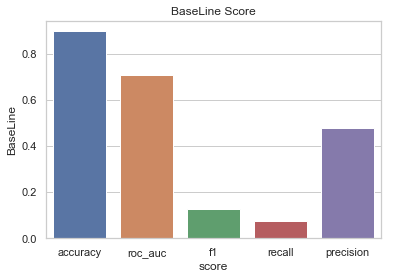

In [363]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="BaseLine", data=score)
ax.set_title('BaseLine Score')

## 2. UnderSampling 시각화

Text(0.5, 1.0, 'NearMiss1 Score')

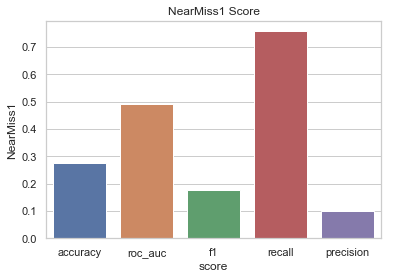

In [364]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="NearMiss1", data=score)
ax.set_title('NearMiss1 Score')

Text(0.5, 1.0, 'NearMiss2 Score')

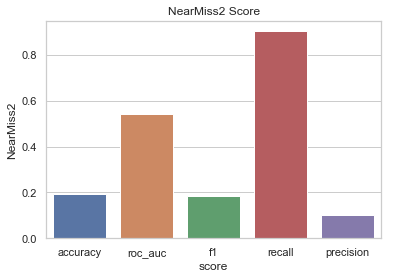

In [365]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="NearMiss2", data=score)
ax.set_title('NearMiss2 Score')

Text(0.5, 1.0, 'NearMiss3 Score')

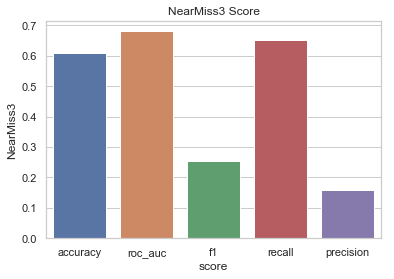

In [366]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="NearMiss3", data=score)
ax.set_title('NearMiss3 Score')

Text(0.5, 1.0, 'RandomUnderSampler')

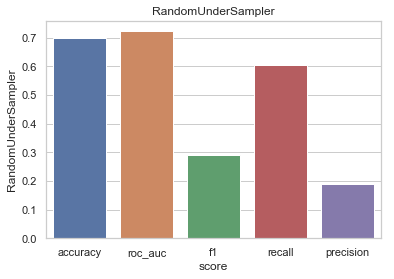

In [367]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="RandomUnderSampler", data=score)
ax.set_title('RandomUnderSampler')

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="CNN", data=score)
ax.set_title('CNN')

Text(0.5, 1.0, 'ENN')

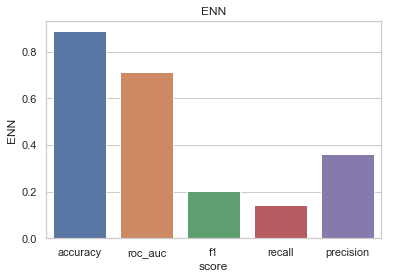

In [368]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="ENN", data=score)
ax.set_title('ENN')

Text(0.5, 1.0, 'Repeated_edites_nearest_neighbor Score')

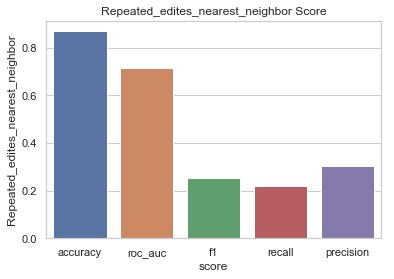

In [369]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="Repeated_edites_nearest_neighbor", data=score)
ax.set_title('Repeated_edites_nearest_neighbor Score')

Text(0.5, 1.0, 'Tomek_Link_Removal Score')

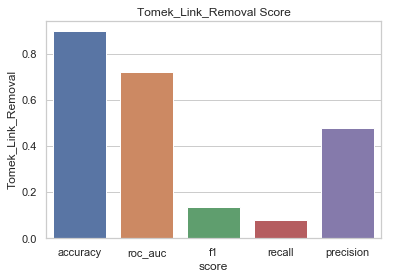

In [370]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="Tomek_Link_Removal", data=score)
ax.set_title('Tomek_Link_Removal Score')

## OverSampling 시각화

Text(0.5, 1.0, 'Random_Oversampling_of_minority_class Score')

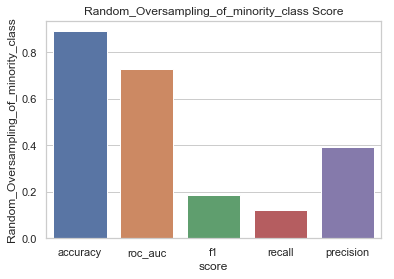

In [371]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="Random_Oversampling_of_minority_class", data=score)
ax.set_title('Random_Oversampling_of_minority_class Score')

Text(0.5, 1.0, 'SMOTE Score')

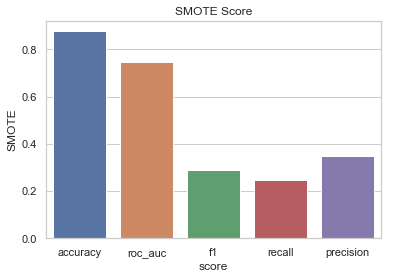

In [372]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="SMOTE", data=score)
ax.set_title('SMOTE Score')

Text(0.5, 1.0, 'SMOTE1 Score')

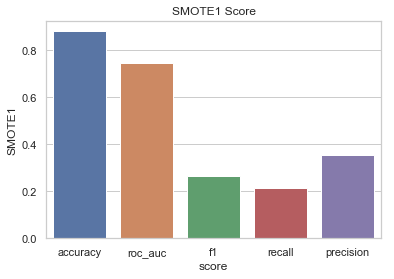

In [373]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="SMOTE1", data=score)
ax.set_title('SMOTE1 Score')

Text(0.5, 1.0, 'SMOTE2 Score')

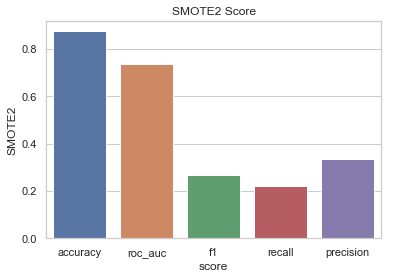

In [374]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="SMOTE2", data=score)
ax.set_title('SMOTE2 Score')

Text(0.5, 1.0, 'SMOTE+TOMEK Score')

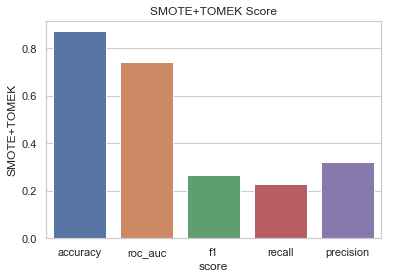

In [375]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="SMOTE+TOMEK", data=score)
ax.set_title('SMOTE+TOMEK Score')

Text(0.5, 1.0, 'SMOTE+ENN Score')

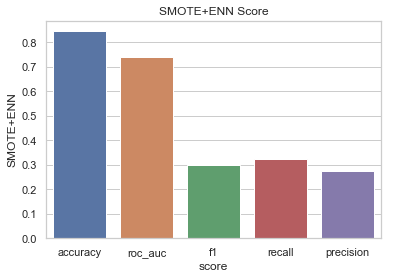

In [376]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="SMOTE+ENN", data=score)
ax.set_title('SMOTE+ENN Score')

## 3. Ensemble 시각화

Text(0.5, 1.0, 'EasyEnsemble Score')

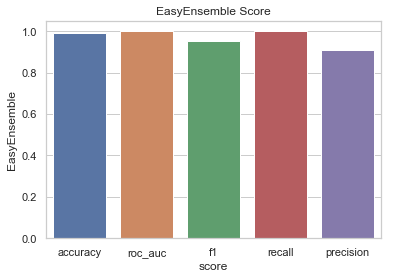

In [377]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="EasyEnsemble", data=score)
ax.set_title('EasyEnsemble Score')

(0.9, 1)

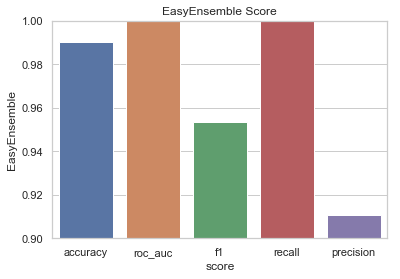

In [378]:
# 다 너무 값이 높아서 확대함.
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="EasyEnsemble", data=score)
ax.set_title('EasyEnsemble Score')
ax.set_ylim([0.9, 1])

Text(0.5, 1.0, 'BalanceCascade Score')

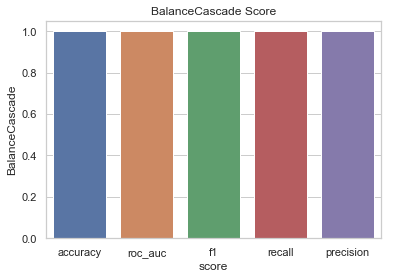

In [379]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="BalanceCascade", data=score)
ax.set_title('BalanceCascade Score')

(0.9985, 1)

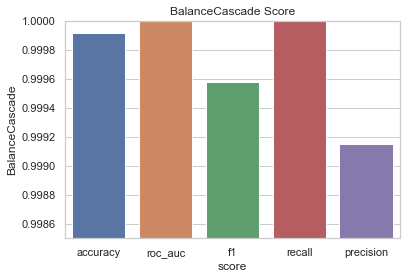

In [380]:
# 다 너무 값이 높아서 확대함.
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="score", y="BalanceCascade", data=score)
ax.set_title('BalanceCascade Score')
ax.set_ylim([0.9985, 1])

## 불균형(원본)데이터 & 모델 적용 후 데이터 recall & precision 값 비교

In [381]:
score

,BaseLine,NearMiss1,NearMiss2,NearMiss3,RandomUnderSampler,ENN,Repeated_edites_nearest_neighbor,Tomek_Link_Removal,Random_Oversampling_of_minority_class,SMOTE,SMOTE1,SMOTE2,SMOTE+TOMEK,SMOTE+ENN,EasyEnsemble,BalanceCascade,score
accuracy,0.897626,0.276033,0.192589,0.610615,0.699360,0.887022,0.869158,0.897511,0.891546,0.876333,0.880683,0.875900,0.872183,0.844724,0.990059,0.999914,accuracy
roc_auc,0.708478,0.490601,0.540528,0.681067,0.722742,0.714384,0.713067,0.719371,0.728012,0.745708,0.745586,0.735757,0.744168,0.738076,0.999888,1.000000,roc_auc
f1,0.127670,0.175602,0.185407,0.254030,0.290107,0.203858,0.253248,0.136860,0.187392,0.287280,0.266430,0.267143,0.267503,0.297118,0.953397,0.999575,f1
recall,0.073675,0.758288,0.903655,0.652026,0.604137,0.142250,0.218192,0.079909,0.122981,0.245112,0.213092,0.222443,0.229527,0.322754,1.000000,1.000000,recall
precision,0.477941,0.099299,0.103301,0.157743,0.190885,0.359599,0.301724,0.476351,0.393472,0.346972,0.355388,0.334327,0.320538,0.275254,0.910945,0.999151,precision


In [382]:
score2 = score.loc[['recall','precision'],:]
score2

,BaseLine,NearMiss1,NearMiss2,NearMiss3,RandomUnderSampler,ENN,Repeated_edites_nearest_neighbor,Tomek_Link_Removal,Random_Oversampling_of_minority_class,SMOTE,SMOTE1,SMOTE2,SMOTE+TOMEK,SMOTE+ENN,EasyEnsemble,BalanceCascade,score
recall,0.073675,0.758288,0.903655,0.652026,0.604137,0.142250,0.218192,0.079909,0.122981,0.245112,0.213092,0.222443,0.229527,0.322754,1.000000,1.000000,recall
precision,0.477941,0.099299,0.103301,0.157743,0.190885,0.359599,0.301724,0.476351,0.393472,0.346972,0.355388,0.334327,0.320538,0.275254,0.910945,0.999151,precision


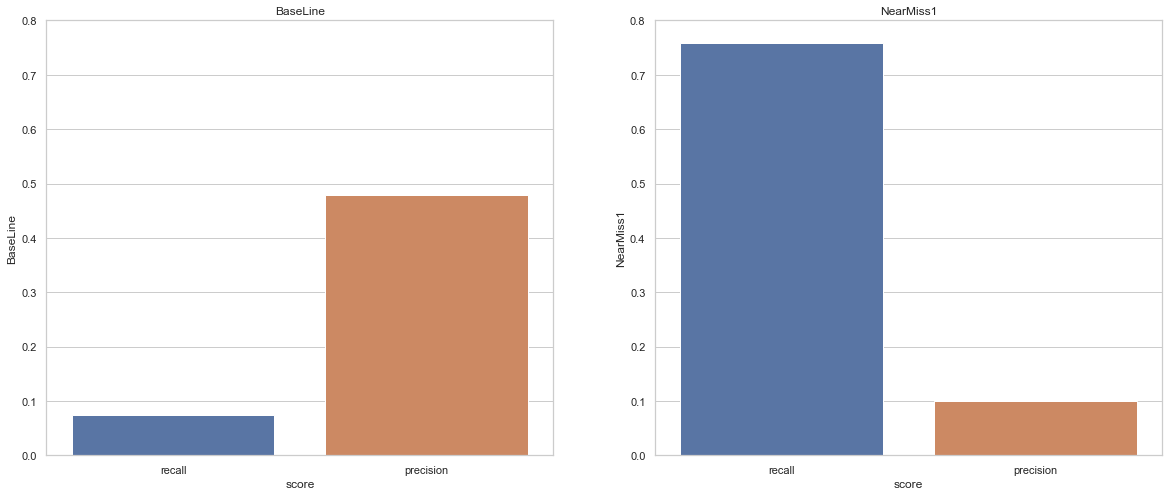

In [383]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 0.8])
sns.barplot(x="score", y="NearMiss1", data=score2, ax=ax[1])
ax[1].set_title('NearMiss1')
ax[1].set_ylim([0, 0.8])
plt.show()

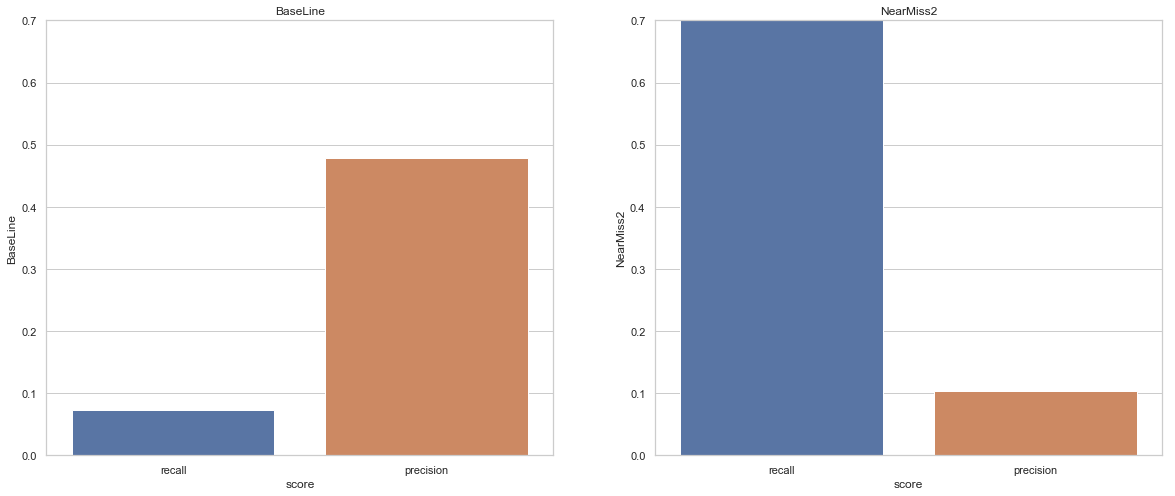

In [384]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 0.7])
sns.barplot(x="score", y="NearMiss2", data=score2, ax=ax[1])
ax[1].set_title('NearMiss2')
ax[1].set_ylim([0, 0.7])
plt.show()

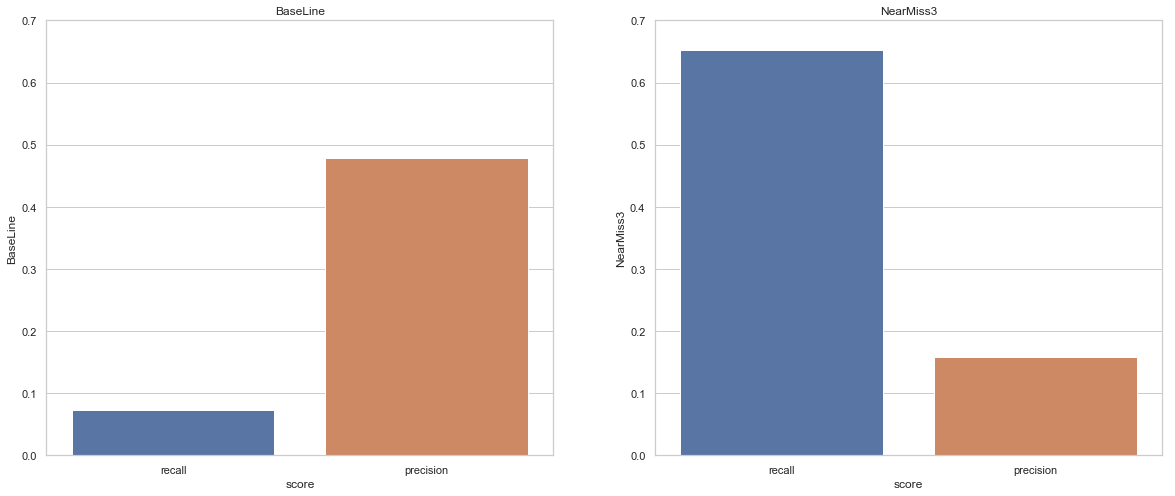

In [385]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 0.7])
sns.barplot(x="score", y="NearMiss3", data=score2, ax=ax[1])
ax[1].set_title('NearMiss3')
ax[1].set_ylim([0, 0.7])
plt.show()

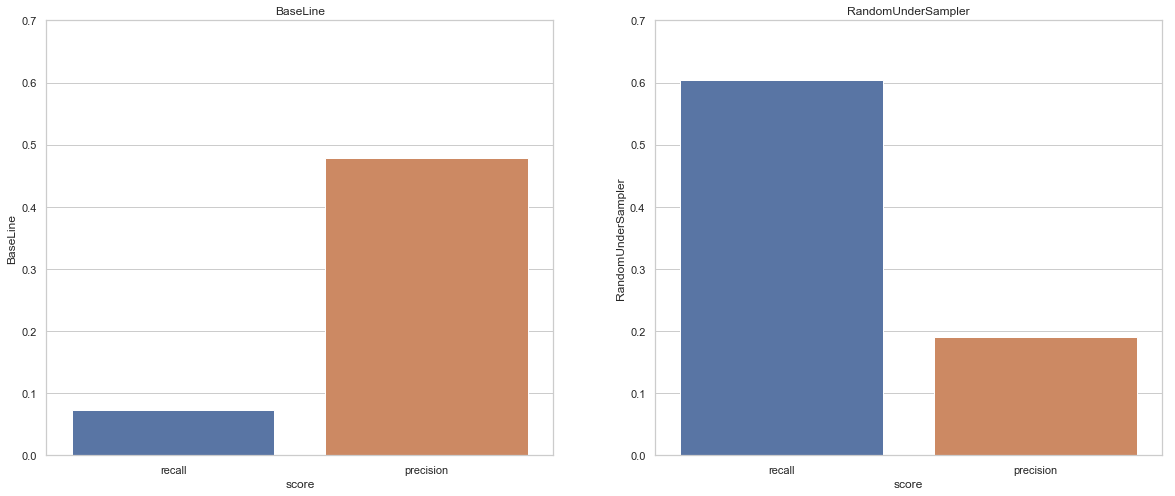

In [386]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 0.7])
sns.barplot(x="score", y="RandomUnderSampler", data=score2, ax=ax[1])
ax[1].set_title('RandomUnderSampler')
ax[1].set_ylim([0, 0.7])
plt.show()

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 0.5])
sns.barplot(x="score", y="CNN", data=score2, ax=ax[1])
ax[1].set_title('CNN')
ax[1].set_ylim([0, 0.5])
plt.show()

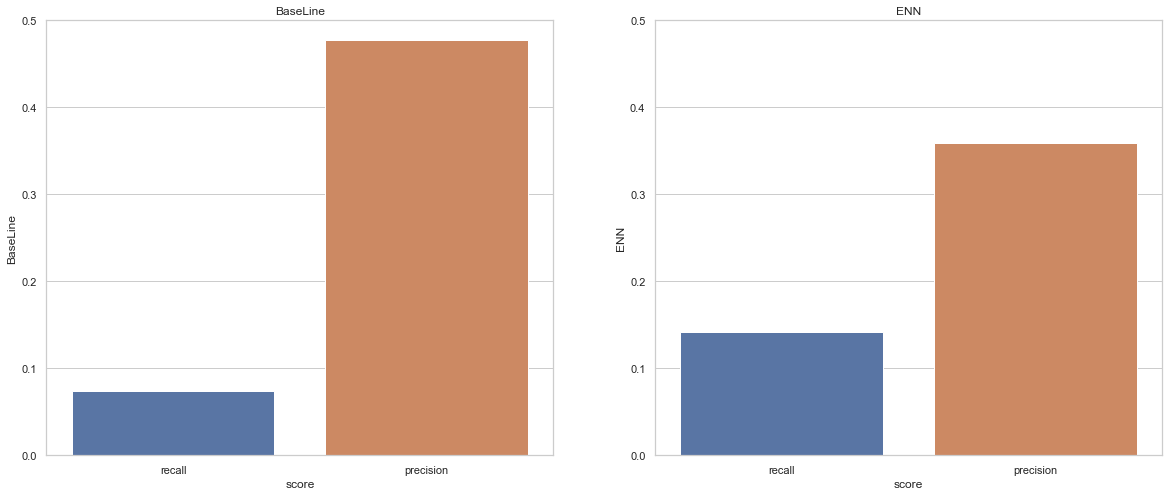

In [387]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 0.5])
sns.barplot(x="score", y="ENN", data=score2, ax=ax[1])
ax[1].set_title('ENN')
ax[1].set_ylim([0, 0.5])
plt.show()

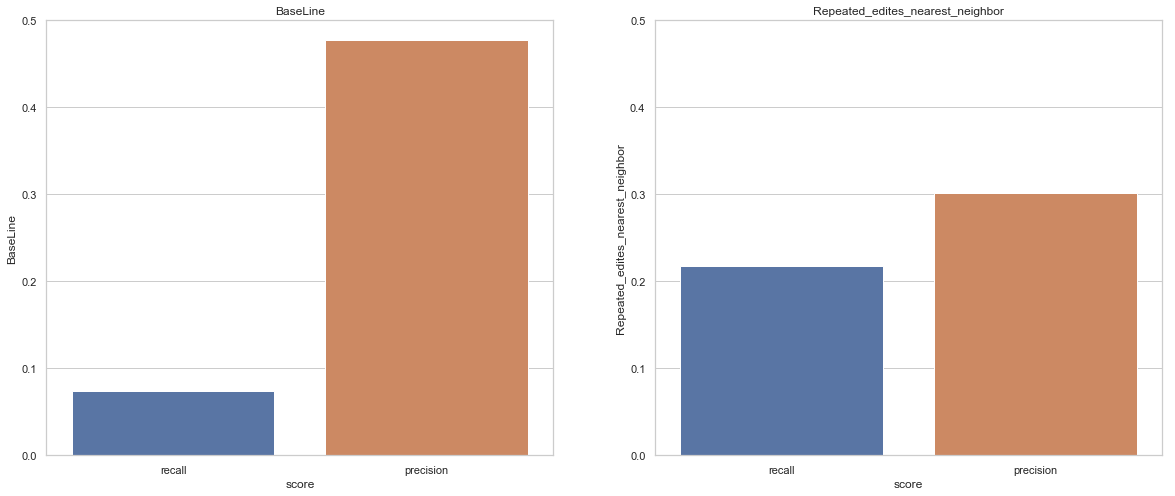

In [388]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 0.5])
sns.barplot(x="score", y="Repeated_edites_nearest_neighbor", data=score2, ax=ax[1])
ax[1].set_title('Repeated_edites_nearest_neighbor')
ax[1].set_ylim([0, 0.5])
plt.show()

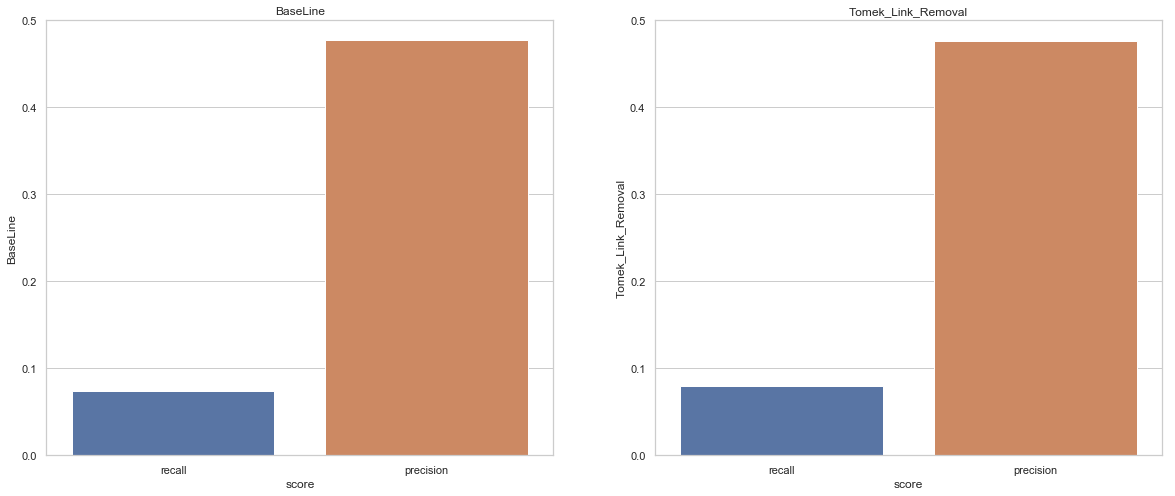

In [389]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 0.5])
sns.barplot(x="score", y="Tomek_Link_Removal", data=score2, ax=ax[1])
ax[1].set_title('Tomek_Link_Removal')
ax[1].set_ylim([0, 0.5])
plt.show()

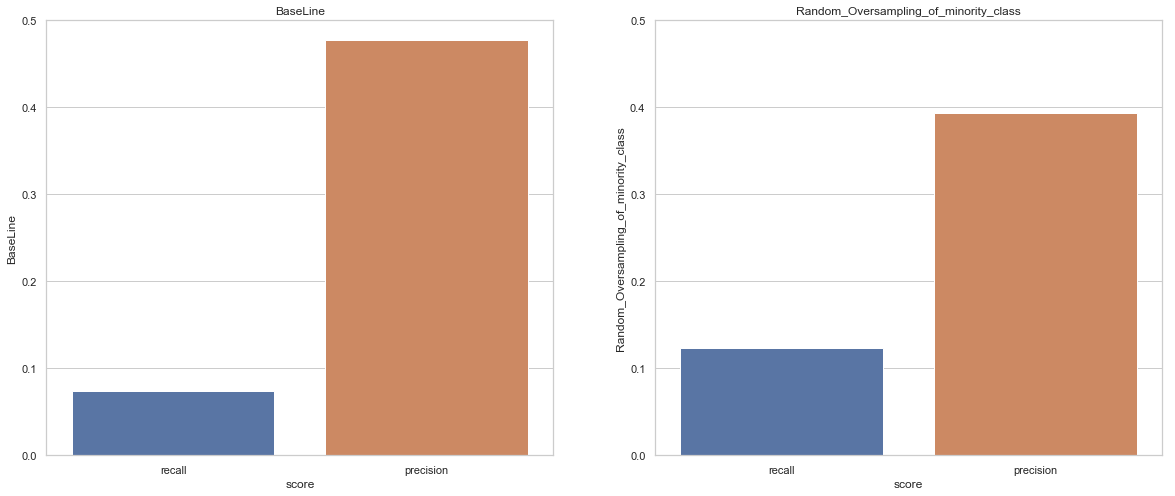

In [390]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 0.5])
sns.barplot(x="score", y="Random_Oversampling_of_minority_class", data=score2, ax=ax[1])
ax[1].set_title('Random_Oversampling_of_minority_class')
ax[1].set_ylim([0, 0.5])
plt.show()

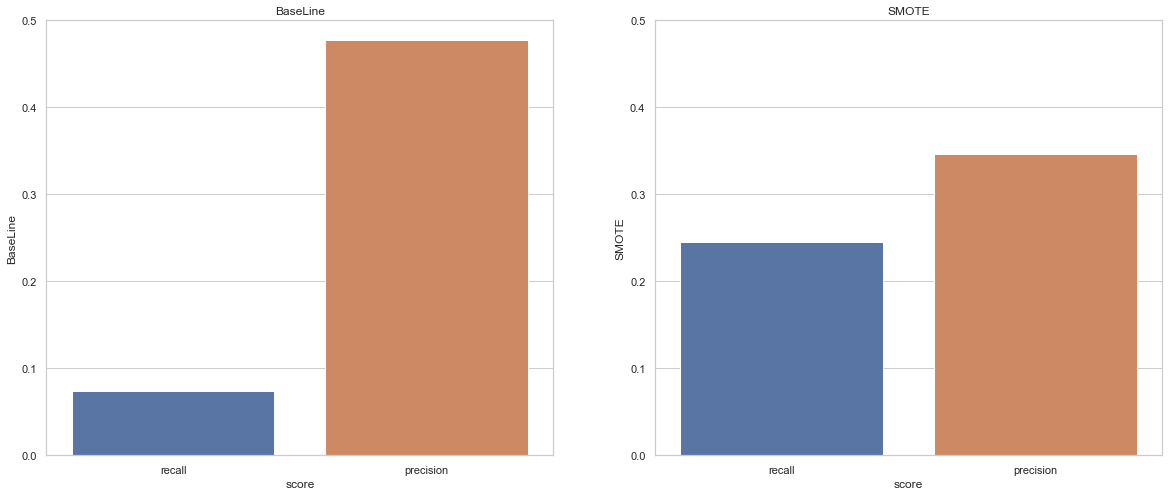

In [391]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 0.5])
sns.barplot(x="score", y="SMOTE", data=score2, ax=ax[1])
ax[1].set_title('SMOTE')
ax[1].set_ylim([0, 0.5])
plt.show()

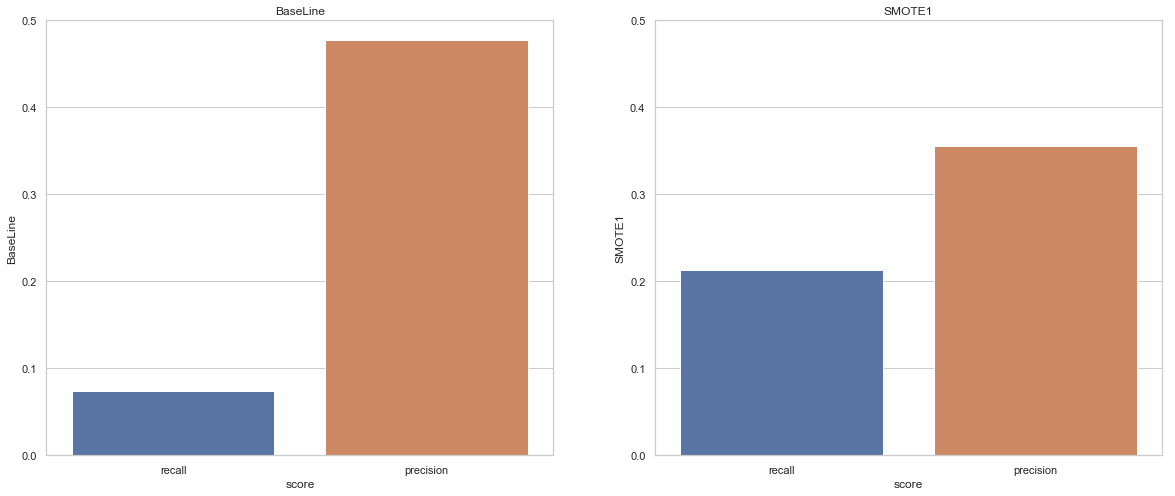

In [392]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 0.5])
sns.barplot(x="score", y="SMOTE1", data=score2, ax=ax[1])
ax[1].set_title('SMOTE1')
ax[1].set_ylim([0, 0.5])
plt.show()

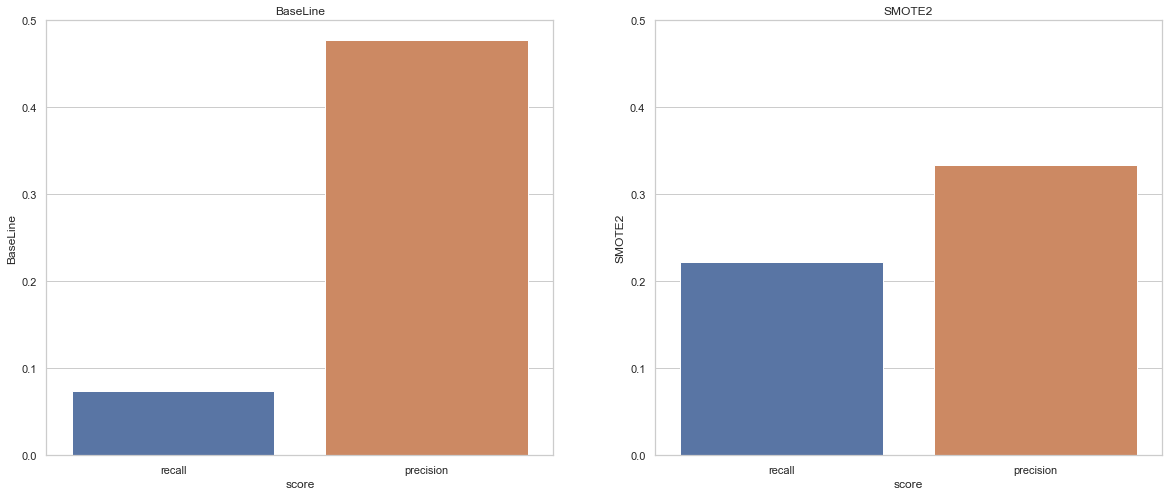

In [393]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 0.5])
sns.barplot(x="score", y="SMOTE2", data=score2, ax=ax[1])
ax[1].set_title('SMOTE2')
ax[1].set_ylim([0, 0.5])
plt.show()

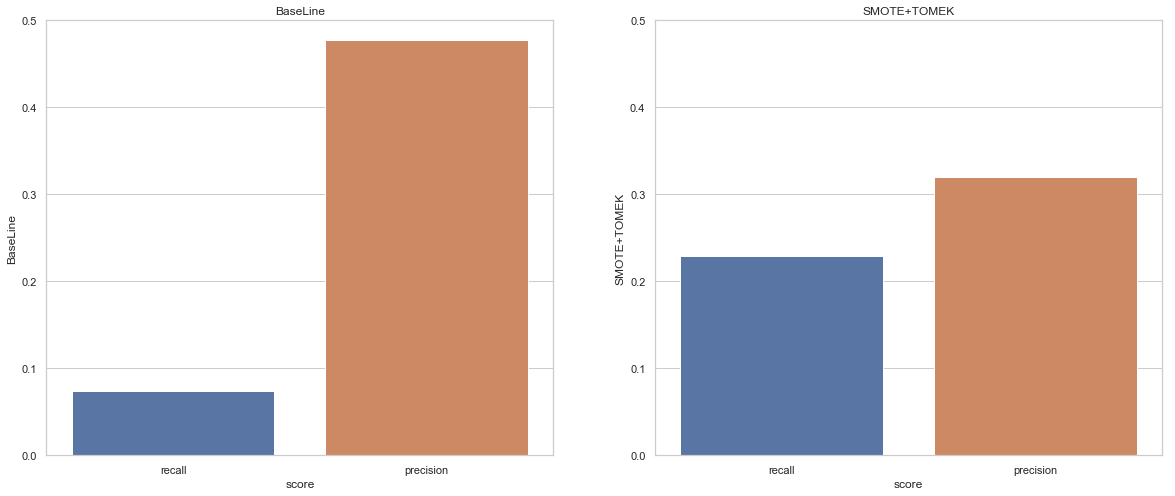

In [394]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 0.5])
sns.barplot(x="score", y="SMOTE+TOMEK", data=score2, ax=ax[1])
ax[1].set_title('SMOTE+TOMEK')
ax[1].set_ylim([0, 0.5])
plt.show()

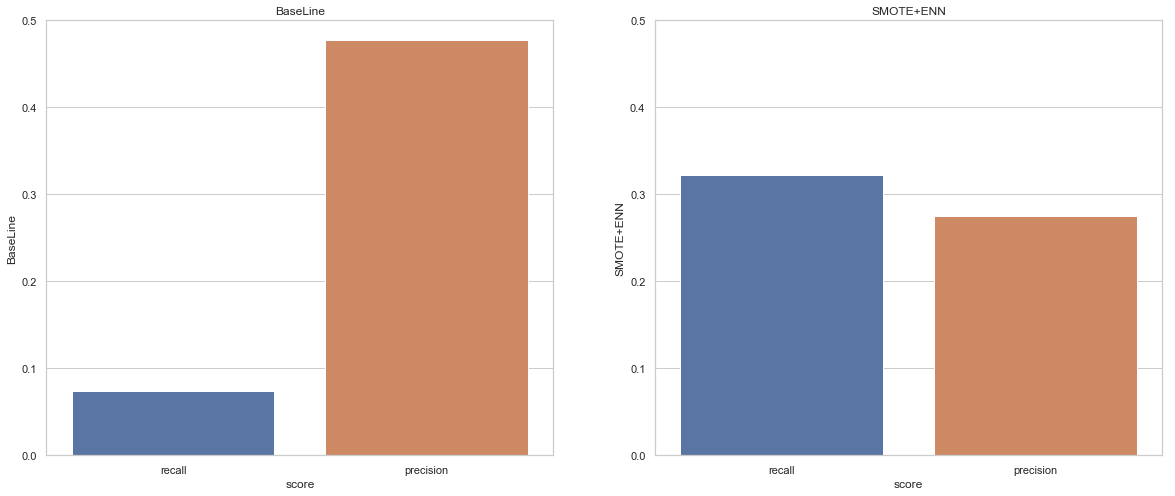

In [395]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 0.5])
sns.barplot(x="score", y="SMOTE+ENN", data=score2, ax=ax[1])
ax[1].set_title('SMOTE+ENN')
ax[1].set_ylim([0, 0.5])
plt.show()

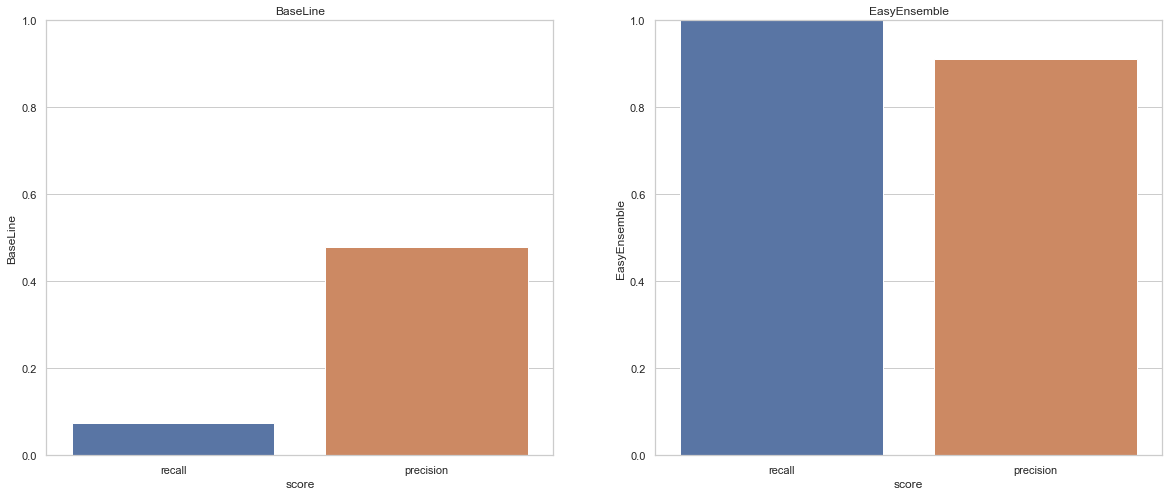

In [396]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 1])
sns.barplot(x="score", y="EasyEnsemble", data=score2, ax=ax[1])
ax[1].set_title('EasyEnsemble')
ax[1].set_ylim([0, 1])
plt.show()

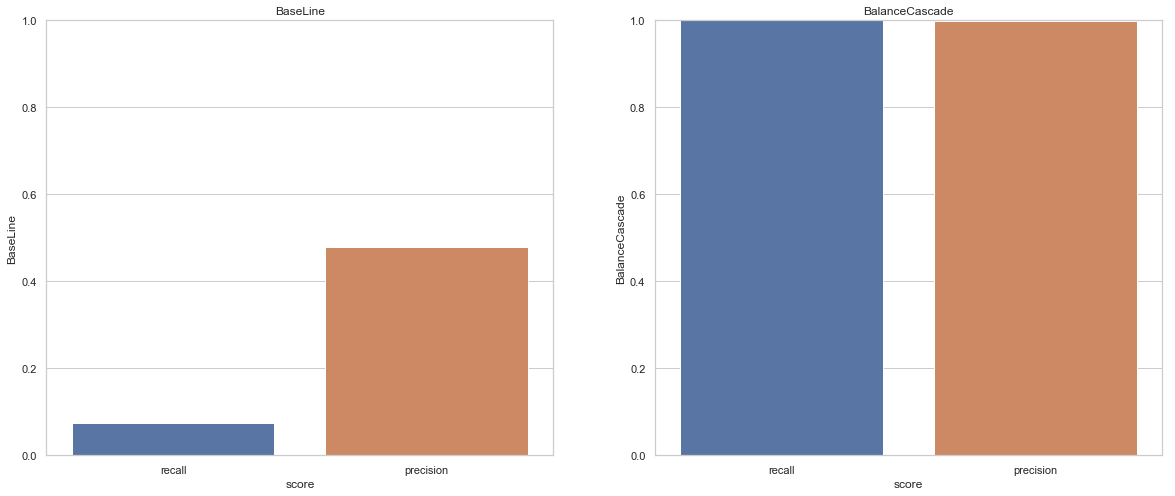

In [397]:
f, ax = plt.subplots(1, 2, figsize=(20,8)) 
sns.barplot(x="score", y="BaseLine", data=score2, ax=ax[0])
ax[0].set_title('BaseLine')
ax[0].set_ylim([0, 1])
sns.barplot(x="score", y="BalanceCascade", data=score2, ax=ax[1])
ax[1].set_title('BalanceCascade')
ax[1].set_ylim([0, 1])
plt.show()